# N Queen 문제
- 설명은 이전 파일에!

ex) 4x4의 체스판이 있다면 ( [0,0] ~ [3,3] )

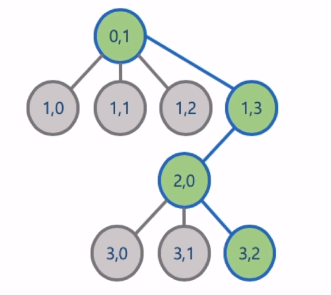

### 1) Promising

수직 체크 & 대각선 체크 ( 어차피 수평으로는 이동 X )

수직 체크
- 같은 수직선에 있으면 안됨!
- 같은 수직선 : 현재 column - 다음 column = 0

대각선 체크
- 같은 대각선에 있으면 안됨!
- 같은 대각선 : abs(Queen column - 현재 column) = 현재 row - Queen row

### 2) Pruning

맨 위의 행부터 Queen 배치 -> 그 다음 행에는 어디에 위치? -> (반복)

## [ N-Queen 구현하기 ]

candidate : 조건을 충족하여 담기게 된 node들의 column

ex) [1,0,3,2] 
- 1번째 행에 column "1"에 위치
- 2번째 행에 column "0"에 위치
- 3번째 행에 column "3"에 위치
- 4번째 행에 column "2"에 위치

### 1. 수직&대각선 체크

In [18]:
def check_ok(candidate,current_col):
    current_row = len(candidate)
    for queen_row in range(current_row):
        check1 = (candidate[queen_row]==current_col)# 1)수직 체크
        check2 = abs(candidate[queen_row]-current_col)==current_row-queen_row
        if check1 or check2:
            return False
    return True   

### 2. DFS (Depth First Search)

In [19]:
def DFS(N,current_row,current_candidate,final_result):
    if current_row == N: # 탐색 완료
        print(current_candidate)
        final_result.append(current_candidate[:])
    
    for candidate_col in range(N):
        if check_ok(current_candidate, candidate_col):
            current_candidate.append(candidate_col)
            DFS(N,current_row+1, current_candidate, final_result)
            # 다음 row에 조건 충족하는게 없으면 backprop!
            current_candidate.pop()

In [20]:
def solve_n_queens(N):
    final_result = []
    DFS(N,0,[],final_result)
    return final_result    

In [21]:
solve_n_queens(4)

[1, 3, 0, 2]
[2, 0, 3, 1]


[[1, 3, 0, 2], [2, 0, 3, 1]]

In [22]:
solve_n_queens(6)

[1, 3, 5, 0, 2, 4]
[2, 5, 1, 4, 0, 3]
[3, 0, 4, 1, 5, 2]
[4, 2, 0, 5, 3, 1]


[[1, 3, 5, 0, 2, 4],
 [2, 5, 1, 4, 0, 3],
 [3, 0, 4, 1, 5, 2],
 [4, 2, 0, 5, 3, 1]]